# Exercise 1

In [1]:
#%matplotlib ipympl
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np

plt.rc('animation', html='jshtml')

## Random Walkers in Numpy - 7.2, a, b

In [2]:
N = 200
P0 = np.zeros(shape=(N,2))

In [3]:
def add_deltaP(P0):
    deltaP = np.zeros(shape=(len(P0),2))
    vs = 2.0*np.pi*np.random.rand(len(P0))
    deltaP[:,0]+=np.cos(vs) 
    deltaP[:,1]+=np.sin(vs)
    return P0 + deltaP

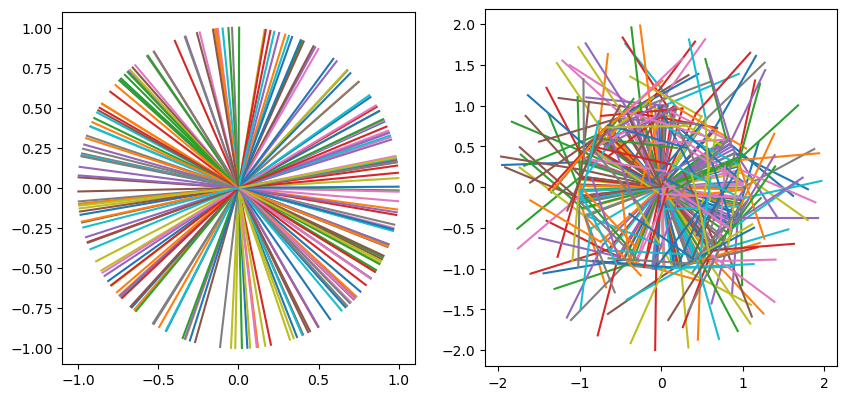

In [4]:
fig, axs = plt.subplots(1,2, figsize=(10,6))

for i, ax in enumerate(axs):
    ax.set_aspect("equal")
    if i == 0:
        P1 = add_deltaP(P0=P0)
        ax.plot([P0[:,0], P1[:,0]],[P0[:,1], P1[:,1]])
    if i == 1:
        P1 = P0
        for n in range(2):
            P2 = add_deltaP(P0=P1)
            ax.plot([P1[:,0], P2[:,0]],[P1[:,1], P2[:,1]])
            P1 = P2

## 7.2 & 7.3 - Both scatterplot and $d_{rms}$

In [ ]:
def get_drms(P0):
    d_2 = np.linalg.norm(P0, axis=1)**2
    return np.sqrt(np.mean(d_2))

def walk_steps(P0, steps=100):
    d_rms = np.zeros(steps)
    P1 = P0
    for i in range(steps):
        P2 = add_deltaP(P0=P1)
        d_rms[i] = get_drms(P0=P2)
        P1 = P2
    return P1, d_rms


In [ ]:
P, d_rms = walk_steps(P0=P0, steps=200)
fig, axs = plt.subplots(1,2, figsize=(10,6))
for ax in axs:
    ax.grid()
axs[0].scatter(P[:,0], P[:,1])
xs= np.log10(np.linspace(1, len(d_rms), len(d_rms)))
axs[1].plot(xs, np.log10(d_rms))

## 7.4 - Animation

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()

N = 200
P0 = np.zeros(shape=(N, 2))

my_colors = ["red", "green", "orange"]

colors = []
for i in range(len(P0) - len(my_colors)):
    colors.append("C0")
colors+=my_colors
ax.set_xlim([-10, 10])
ax.set_ylim([-10,10])
points = ax.scatter(P0[:,0], P0[:,1], c=colors)

In [ ]:
N_anim = 60

anim_list = [P0]
P1 = P0
for i in range(N_anim - 1):
    if i == 0:
        P1, _ = walk_steps(P0=P0, steps=1)
    else:
        P1, _ = walk_steps(P0=P1, steps=1)
    anim_list.append(P1)

def update(i):
    points.set_offsets(anim_list[i])
    return [points]

In [ ]:
anim = animation.FuncAnimation(fig,
                               update,
                               frames=N_anim,
                               interval=75,
                               blit=True)
anim

## 7.5 - Challenge